# ***Handwritten Digit Recognization Task -CodeClause AI-Intern***
## ***Importing Important libraries***

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### ***Loading mnist dataset from tensorflow***

In [2]:
#The dataset is 60,000 training, 10,000 testing
mnist= tf.keras.datasets.mnist

In [3]:
#Splitting the data intro training, testing
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

### ***Visualizing the training data***

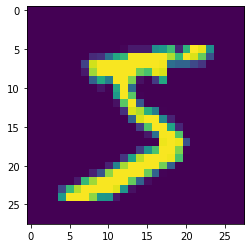

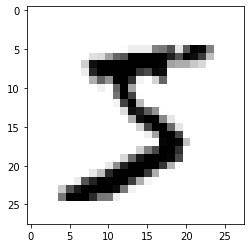

In [7]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary);

In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### ***Data pre-processing***




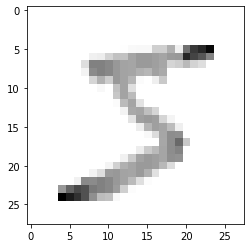

In [9]:
##Normalizing the training data
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
print(y_train[0])

5


In [11]:
##reshaping the input image
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("The training resized-image dimension is ", x_trainr.shape)
print("The testing resized-image dimension is ", x_testr.shape)

The training resized-image dimension is  (60000, 28, 28, 1)
The testing resized-image dimension is  (10000, 28, 28, 1)


###***Creating the model(CNN)***

In [12]:
##CNN Model
model= Sequential()
#First conv layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
##Second conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
##Third conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
##First fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
##Second fc
model.add(Dense(32))
model.add(Activation("relu"))
##Third fc
model.add(Dense(10)) ##Output is 10-classes
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
print(len(x_trainr))

60000


###***Setting the value for important model parameters***

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

###***Model Training***

In [16]:
model.fit(x_trainr,y_train,epochs=16,validation_split=0.3)

Epoch 1/16
1313/1313 [==============================] - 15s 5ms/step - loss: 0.3201 - accuracy: 0.8975 - val_loss: 0.1543 - val_accuracy: 0.9531
Epoch 2/16
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1039 - accuracy: 0.9684 - val_loss: 0.1032 - val_accuracy: 0.9695
Epoch 3/16
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0730 - accuracy: 0.9768 - val_loss: 0.0702 - val_accuracy: 0.9781
Epoch 4/16
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 5/16
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0748 - val_accuracy: 0.9775
Epoch 6/16
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.0869 - val_accuracy: 0.9758
Epoch 7/16
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0858 - val_accuracy

In [17]:
##Evaluating the model
test_loss, test_acc= model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation accuracy is ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9836
Test loss on 10,000 test samples 0.07254735380411148
Validation accuracy is  0.9836000204086304


In [18]:
##Using the model for prediction on test samples
prediction=model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [19]:
print(prediction)

[[1.3845615e-11 6.0525417e-07 1.4054610e-08 ... 9.9999917e-01
  3.3466615e-11 1.3889013e-08]
 [4.2283417e-09 3.1583822e-09 1.0000000e+00 ... 3.7671040e-09
  2.8654901e-09 1.1176750e-10]
 [3.0452998e-08 9.9999988e-01 9.5276100e-08 ... 2.1669752e-08
  1.1496146e-08 5.8708566e-11]
 ...
 [9.1136870e-16 3.1614225e-11 1.6099292e-12 ... 1.6652672e-10
  1.0235139e-10 1.3823152e-10]
 [1.5472223e-07 9.8751651e-10 6.6542807e-15 ... 1.8016540e-12
  1.0939478e-07 6.2283338e-09]
 [4.6215680e-09 1.0510252e-08 8.2455281e-10 ... 5.5675499e-11
  7.0540729e-08 3.3672166e-11]]


###***Visualization of the prediction output of testing samples***

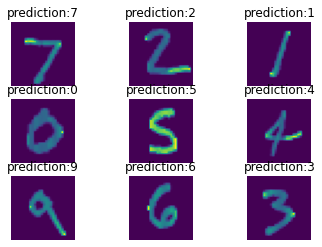

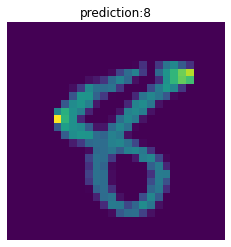

In [34]:
fig, ax=plt.subplots(3,3)
ax[0][0].imshow(x_test[0]);
ax[0][0].set_title(f"prediction:{np.argmax(prediction[0])}");
ax[0][0].axis("off");
ax[0][1].imshow(x_test[1]);
ax[0][1].set_title(f"prediction:{np.argmax(prediction[1])}");
ax[0][1].axis("off");
ax[0][2].imshow(x_test[2]);
ax[0][2].set_title(f"prediction:{np.argmax(prediction[2])}");
ax[0][2].axis("off");
ax[1][0].imshow(x_test[3]);
ax[1][0].set_title(f"prediction:{np.argmax(prediction[3])}");
ax[1][0].axis("off");
ax[1][1].imshow(x_test[240]);
ax[1][1].set_title(f"prediction:{np.argmax(prediction[240])}");
ax[1][1].axis("off");
ax[1][2].imshow(x_test[300]);
ax[1][2].set_title(f"prediction:{np.argmax(prediction[300])}");
ax[1][2].axis("off");
ax[2][0].imshow(x_test[7]);
ax[2][0].set_title(f"prediction:{np.argmax(prediction[7])}");
ax[2][0].axis("off");
ax[2][1].imshow(x_test[81]);
ax[2][1].set_title(f"prediction:{np.argmax(prediction[81])}");
ax[2][1].axis("off");
ax[2][2].imshow(x_test[30]);
ax[2][2].set_title(f"prediction:{np.argmax(prediction[30])}");
ax[2][2].axis("off");
fig,ax=plt.subplots(1,1)
ax.imshow(x_test[84]);
ax.set_title(f"prediction:{np.argmax(prediction[84])}");
ax.axis("off");